<a href="https://colab.research.google.com/github/SGopika1/Intern-DYNX-Task2/blob/main/Intern-DYNX-Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving student_performance.csv to student_performance.csv
✅ File loaded: student_performance.csv


,Hours_Studied,Attendance,Final_Score,Result
0,4.85,95,50.83,Pass
1,3.68,91,39.52,Fail
2,4.61,54,43.66,Fail
3,2.09,79,30.05,Fail
4,9.83,77,59.61,Pass



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  60 non-null     float64
 1   Attendance     60 non-null     int64  
 2   Final_Score    60 non-null     float64
 3   Result         60 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB
None

Missing values per column:
 Hours_Studied    0
Attendance       0
Final_Score      0
Result           0
dtype: int64

✅ Created target column 'Result' based on Final_Score >= 40 (1=Pass, 0=Fail)

✅ Model Accuracy: 83.33%


/tmp/ipython-input-173451689.py:31: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors='ignore')


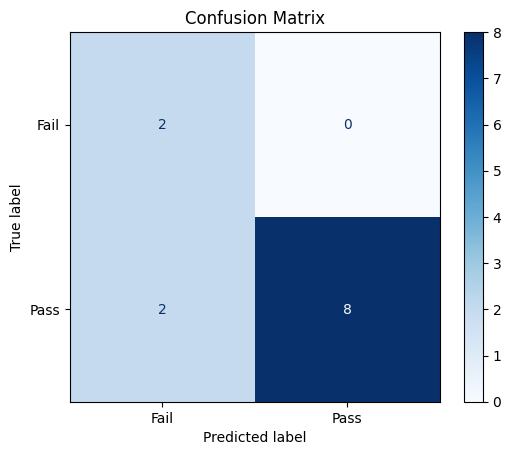

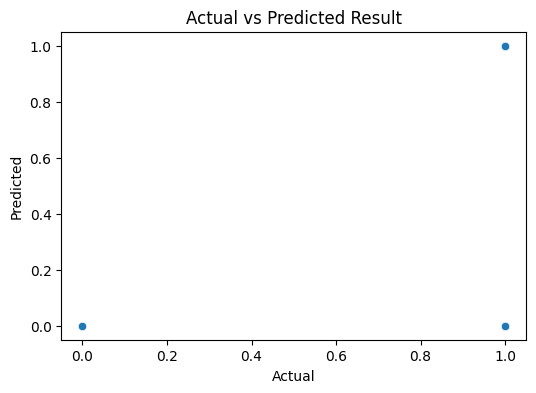

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Cleaned dataset with 'Result' column downloaded successfully.

=== WHAT TO SUBMIT ===
1️⃣ This notebook (.ipynb)  →  File > Download > Download .ipynb
2️⃣ Or PDF (if required)  →  File > Print > Save as PDF



In [1]:
#student performance in task4 to find fail or pass

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()   # 👈 Upload student_performance.csv

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# STEP 3: Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("✅ File loaded:", filename)
display(df.head())

# STEP 4: Basic info
print("\n--- Dataset Info ---")
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())

# STEP 5: Clean & prepare data
# Convert columns to numeric where needed
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='ignore')

# Example assumption: if dataset has "Exam_Score" or "Score", we create Pass/Fail
score_col = None
for col in df.columns:
    if "score" in col.lower() or "marks" in col.lower():
        score_col = col
        break

if not score_col:
    raise ValueError("Couldn't find a score column. Please ensure one exists in the dataset.")

# Create Pass/Fail target (pass if >= 40)
df["Result"] = np.where(df[score_col] >= 40, 1, 0)

print(f"\n✅ Created target column 'Result' based on {score_col} >= 40 (1=Pass, 0=Fail)")

# Drop non-numeric or irrelevant columns
X = df.select_dtypes(include=[np.number]).drop(columns=["Result"], errors='ignore')
y = df["Result"]

# STEP 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train simple logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# STEP 8: Predictions
y_pred = model.predict(X_test)

# STEP 9: Evaluate performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n✅ Model Accuracy: {acc*100:.2f}%")

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail","Pass"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# STEP 10: Visualize actual vs predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Result")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# STEP 11: Save cleaned + labeled data
cleaned_file = "student_performance_with_result.csv"
df.to_csv(cleaned_file, index=False)
files.download(cleaned_file)
print("\n✅ Cleaned dataset with 'Result' column downloaded successfully.")

print("""
=== WHAT TO SUBMIT ===
1️⃣ This notebook (.ipynb)  →  File > Download > Download .ipynb
2️⃣ Or PDF (if required)  →  File > Print > Save as PDF
""")

